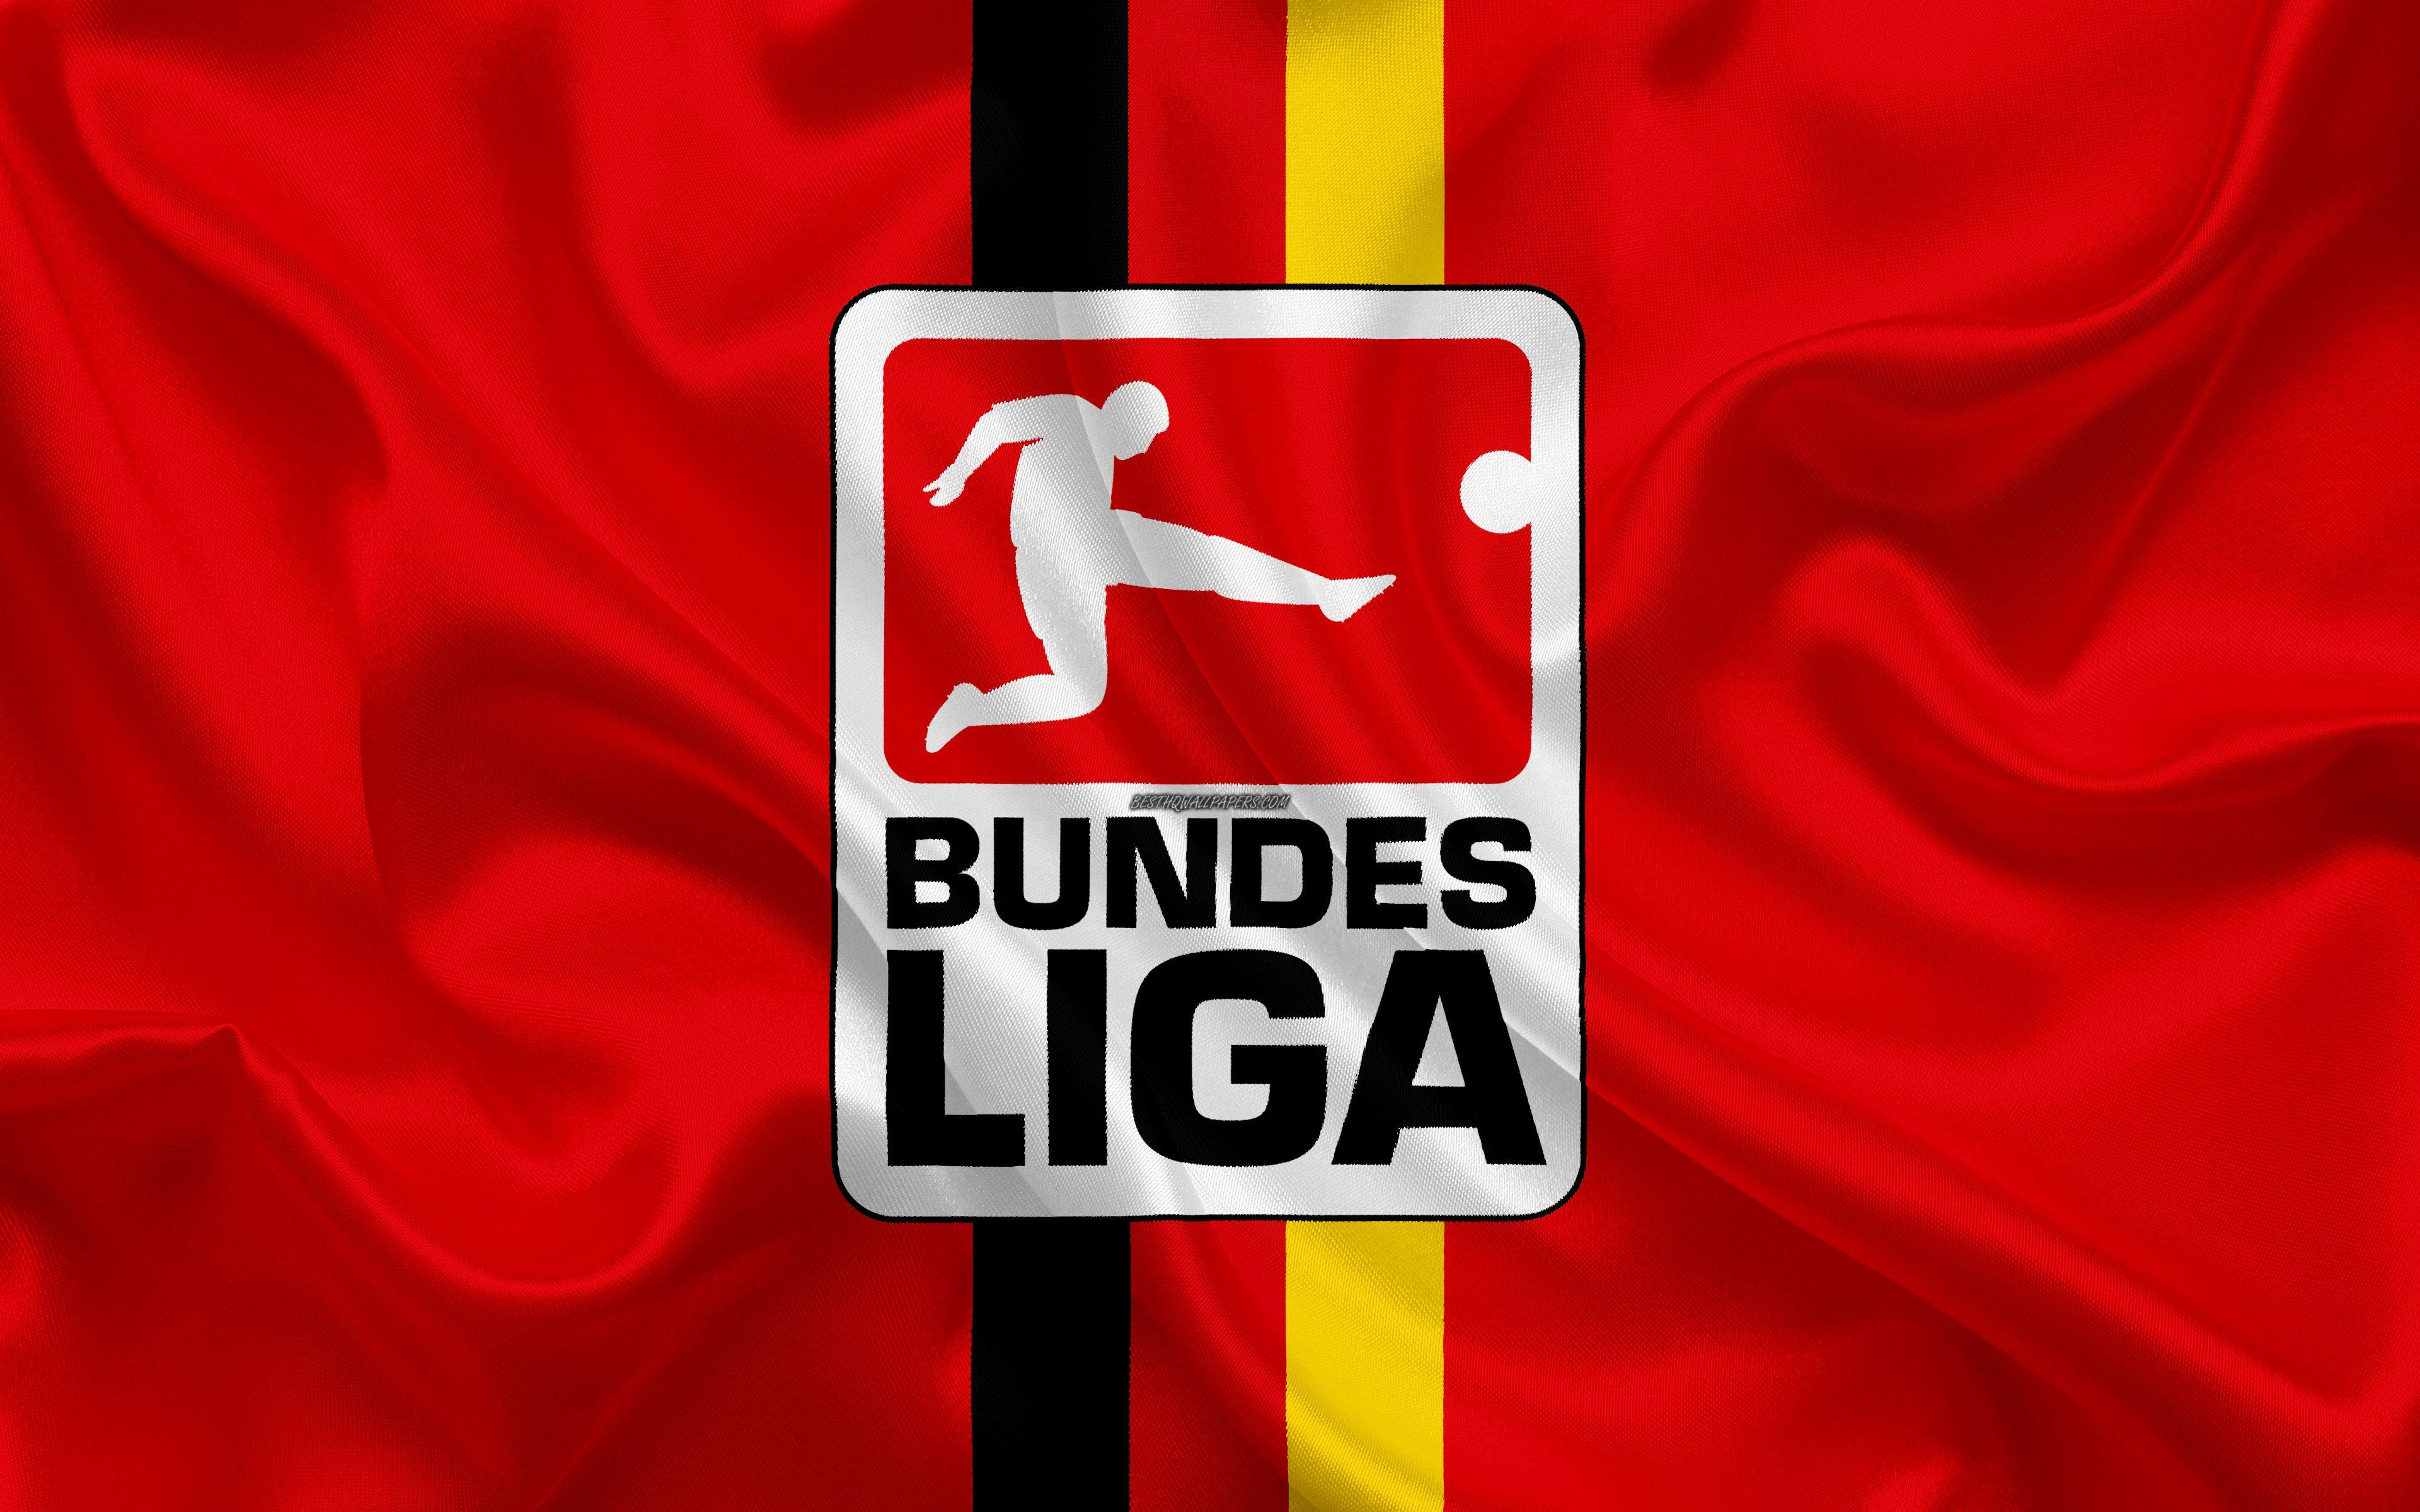

In [3]:
from IPython.display import Image
Image("/workspaces/ProjectDataAnalytics/Bundesliga.jpg", width='1000')


# Bundesliga
Group-Nr. 17

Betim Durmishi<br>
durmibet@students.zhaw.ch<br>
BA.WIN.23HS.VZa

Simon Lindenmann<br>
lindesi2@students.zhaw.ch<br>
BA.WIN.23HS.VZa

Yannick Loretan<br>
loretyan@student.zhaw.ch<br>
BA.WIN.23HS.VZa

# Imports, libraries and setting

In [39]:
# Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
#import folium

# Ignore Warnings


#Show current working directory
print(os.getcwd())

/workspaces/ProjectDataAnalytics


# Create Dataframes

In [5]:
df_spieler = pd.read_csv('spieler_profil.csv', sep=';')
df_spieler.head()

,Vereinsname,Spieler_id,Name,Geburtsdatum,Spieleralter,Geburtsort,Staatsbuergerschaft,Groesse_in_M,Position,Fuss
0,1.FC Heidenheim 1846,43824,Kevin Muller,15.03.1991,33,Rostock,Deutschland,1.90,Torwart,rechts
1,1.FC Heidenheim 1846,806948,Frank Feller,07.01.2004,21,Leonberg,Deutschland,1.83,Torwart,rechts
2,1.FC Heidenheim 1846,57796,Vitus Eicher,05.11.1990,34,Erding,Deutschland,1.91,Torwart,links
3,1.FC Heidenheim 1846,519035,Paul Tschernuth,20.01.2002,22,Salzburg,Oesterreich,1.86,Torwart,links
4,1.FC Heidenheim 1846,227084,Benedikt Gimber,19.02.1997,27,Buchen,Deutschland,1.87,Abwehr - Innenverteidiger,links


In [6]:
df_seasons = pd.read_csv('combined_seasons.csv', sep=';')
df_seasons.head()

,spieler_id,Wettbewerb_id,Saison,Wettbewerb,Verein,Einsätze,Tore,Torvorlagen,Spiele ohne Gegentor,Eingesetzte Minuten
0,43824,1,'24/25',Bundesliga,1.FC Heidenheim 1846,16,-,NaN,5,1440
1,43824,1,'23/24',Bundesliga,1.FC Heidenheim 1846,34,-,NaN,6,3060
2,43824,1,'22/23',2. Bundesliga,1.FC Heidenheim 1846,34,-,NaN,15,3060
3,43824,1,'21/22',2. Bundesliga,1.FC Heidenheim 1846,34,-,NaN,8,3060
4,43824,1,'20/21',2. Bundesliga,1.FC Heidenheim 1846,33,-,NaN,10,2970


In [7]:
df_value = pd.read_csv('market_value_data.csv', sep=';')
df_value.head()

,player_id,year,market_value
0,133731,2025.00,2956676.14
1,133731,2024.57,2956676.14
2,133731,2023.94,2913352.27
3,133731,2023.45,2913352.27
4,133731,2023.30,2913352.27


# Data preperation

### Replace content with realistic data by using regex

Bruched mir nöd unbedingt hend replace mit zero anstatt das.

### Reorganise all the market value astimates to average market values per year

In [8]:
# Ergebnisse speichern
result_rows = []

# Spieler-IDs durchlaufen
for player_id in df_value["player_id"].unique():
    # Daten für den aktuellen Spieler filtern
    player_data = df_value[df_value["player_id"] == player_id]

    # Tiefstes Jahr finden und runden
    min_year = player_data["year"].min()
    min_year_rounded = int(round(min_year))

    # Von min_year_rounded bis 2025 iterieren
    for year in range(min_year_rounded, 2026):
        # Daten innerhalb von ±0.5 des aktuellen Jahres filtern
        year_data = player_data[(player_data["year"] > year - 0.5) & (player_data["year"] <= year + 0.5)]

        if len(year_data) > 0:
            # Durchschnitt berechnen, falls Daten vorhanden sind
            avg_market_value = year_data["market_value"].mean()
        else:
            # Durchschnitt aus nächstgelegenen Jahren berechnen
            before_year_data = player_data[player_data["year"] < year]
            after_year_data = player_data[player_data["year"] > year]

            avg_before = before_year_data["market_value"].mean() if len(before_year_data) > 0 else np.nan
            avg_after = after_year_data["market_value"].mean() if len(after_year_data) > 0 else np.nan

            # Durchschnitt von beiden oder nächstliegendem Jahr, falls eins fehlt
            avg_market_value = np.nanmean([avg_before, avg_after])

        # Marktwert auf die nächsten 100 runden
        avg_market_value = round(avg_market_value / 100) * 100 if not np.isnan(avg_market_value) else np.nan

        # Ergebnis speichern
        result_rows.append({
            "player_id": player_id,
            "year": year,
            "avg_market_value": avg_market_value
        })

# Ergebnisse in einen DataFrame umwandeln
result_df = pd.DataFrame(result_rows)
df_value = result_df
# Ausgabe anzeigen
df_value.head(25)


,player_id,year,avg_market_value
0,133731,2012,545000
1,133731,2013,1050400
2,133731,2014,1440300
3,133731,2015,1440300
4,133731,2016,1353700
5,133731,2017,1819400
6,133731,2018,2090200
7,133731,2019,2682300
8,133731,2020,2826700
9,133731,2021,2859200


### Count, identify and remove missing values

In [9]:
# Zeilen mit fehlenden Werten identifizieren und löschen
columns_to_check_spieler = ['Geburtsdatum', 'Spieleralter', 'Geburtsort', 'Staatsbuergerschaft', 'Groesse_in_M', 'Position', 'Fuss']
columns_to_check_seasons = ['Saison', 'Wettbewerb', 'Verein', 'Einsätze', 'Tore', 'Torvorlagen', 'Spiele ohne Gegentor', 'Eingesetzte Minuten']

# Spieler-Daten: Zeilen, die gelöscht werden, identifizieren
deleted_spieler = df_spieler[df_spieler[columns_to_check_spieler].isna().all(axis=1)]
df_spieler_cleaned = df_spieler.dropna(subset=columns_to_check_spieler, how='all')

# Anzeige der gelöschten Zeilen
print("Gelöschte Zeilen in df_spieler:")
display(deleted_spieler)

# Bereinigter df_spieler anzeigen
print("Bereinigter df_spieler DataFrame:")
display(df_spieler_cleaned)

# Saison-Daten: Zeilen, die gelöscht werden, identifizieren
deleted_seasons = df_seasons[df_seasons[columns_to_check_seasons].isna().all(axis=1)]
df_seasons_cleaned = df_seasons.dropna(subset=columns_to_check_seasons, how='all')

# Anzeige der gelöschten Zeilen
print("Gelöschte Zeilen in df_seasons:")
display(deleted_seasons)

# Bereinigter df_seasons anzeigen
print("Bereinigter df_seasons DataFrame:")
display(df_seasons_cleaned)

# bereinigung übertragen
df_seasons = df_seasons_cleaned
df_spieler = df_spieler_cleaned

Gelöschte Zeilen in df_spieler:


,Vereinsname,Spieler_id,Name,Geburtsdatum,Spieleralter,Geburtsort,Staatsbuergerschaft,Groesse_in_M,Position,Fuss
290,Holstein Kiel,651269,Armin Gigovic,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Bereinigter df_spieler DataFrame:


,Vereinsname,Spieler_id,Name,Geburtsdatum,Spieleralter,Geburtsort,Staatsbuergerschaft,Groesse_in_M,Position,Fuss
0,1.FC Heidenheim 1846,43824,Kevin Muller,15.03.1991,33,Rostock,Deutschland,1.90,Torwart,rechts
1,1.FC Heidenheim 1846,806948,Frank Feller,07.01.2004,21,Leonberg,Deutschland,1.83,Torwart,rechts
2,1.FC Heidenheim 1846,57796,Vitus Eicher,05.11.1990,34,Erding,Deutschland,1.91,Torwart,links
3,1.FC Heidenheim 1846,519035,Paul Tschernuth,20.01.2002,22,Salzburg,Oesterreich,1.86,Torwart,links
4,1.FC Heidenheim 1846,227084,Benedikt Gimber,19.02.1997,27,Buchen,Deutschland,1.87,Abwehr - Innenverteidiger,links
...,...,...,...,...,...,...,...,...,...,...
501,VfL Wolfsburg,391004,Jonas Wind,07.02.1999,25,Hvidovre,Daenemark,1.90,Sturm - Mittelstuermer,rechts
502,VfL Wolfsburg,616344,Tiago Tomas,16.06.2002,22,Cascais,Portugal,1.80,Sturm - Mittelstuermer,rechts
503,VfL Wolfsburg,314288,Lukas Nmecha,14.12.1998,26,Hamburg,Deutschland/England,1.85,Sturm - Mittelstuermer,rechts
504,VfL Wolfsburg,117432,Kevin Behrens,03.02.1991,33,Bremen,Deutschland,1.85,Sturm - Mittelstuermer,beidfuessig


Gelöschte Zeilen in df_seasons:


,spieler_id,Wettbewerb_id,Saison,Wettbewerb,Verein,Einsätze,Tore,Torvorlagen,Spiele ohne Gegentor,Eingesetzte Minuten


Bereinigter df_seasons DataFrame:


,spieler_id,Wettbewerb_id,Saison,Wettbewerb,Verein,Einsätze,Tore,Torvorlagen,Spiele ohne Gegentor,Eingesetzte Minuten
0,43824,1,'24/25',Bundesliga,1.FC Heidenheim 1846,16,-,NaN,5,1440
1,43824,1,'23/24',Bundesliga,1.FC Heidenheim 1846,34,-,NaN,6,3060
2,43824,1,'22/23',2. Bundesliga,1.FC Heidenheim 1846,34,-,NaN,15,3060
3,43824,1,'21/22',2. Bundesliga,1.FC Heidenheim 1846,34,-,NaN,8,3060
4,43824,1,'20/21',2. Bundesliga,1.FC Heidenheim 1846,33,-,NaN,10,2970
...,...,...,...,...,...,...,...,...,...,...
14093,535551,2,'22/23',DFB-Pokal,VfL Wolfsburg,-,-,-,NaN,-
14094,535551,2,'20/21',DFB-Pokal,VfL Wolfsburg,4,-,-,NaN,41
14095,535551,2,'19/20',Polnischer Pokal,Zaglebie Lubin,1,-,-,NaN,78
14096,535551,2,'19/20',Polnischer Pokal,Zaglebie Lubin II,1,1,-,NaN,60


### Replace all NaN numerical columns columns with Zero

In [10]:
# Spalten in df_seasons, die mit der Zahl 0 ersetzt werden sollen
columns_to_replace_with_zero = ['Einsätze', 'Tore', 'Torvorlagen', 'Spiele ohne Gegentor', 'Eingesetzte Minuten']

# Nur die spezifischen Spalten anpassen: "-" und NaN durch die Zahl 0 ersetzen
df_seasons[columns_to_replace_with_zero] = df_seasons[columns_to_replace_with_zero].replace("-", 0).fillna(0)

print("df_seasons mit NaN und '-' in spezifischen Spalten durch 0 ersetzt:")
display(df_seasons)

df_seasons mit NaN und '-' in spezifischen Spalten durch 0 ersetzt:


,spieler_id,Wettbewerb_id,Saison,Wettbewerb,Verein,Einsätze,Tore,Torvorlagen,Spiele ohne Gegentor,Eingesetzte Minuten
0,43824,1,'24/25',Bundesliga,1.FC Heidenheim 1846,16,0,0,5,1440
1,43824,1,'23/24',Bundesliga,1.FC Heidenheim 1846,34,0,0,6,3060
2,43824,1,'22/23',2. Bundesliga,1.FC Heidenheim 1846,34,0,0,15,3060
3,43824,1,'21/22',2. Bundesliga,1.FC Heidenheim 1846,34,0,0,8,3060
4,43824,1,'20/21',2. Bundesliga,1.FC Heidenheim 1846,33,0,0,10,2970
...,...,...,...,...,...,...,...,...,...,...
14093,535551,2,'22/23',DFB-Pokal,VfL Wolfsburg,0,0,0,0,0
14094,535551,2,'20/21',DFB-Pokal,VfL Wolfsburg,4,0,0,0,41
14095,535551,2,'19/20',Polnischer Pokal,Zaglebie Lubin,1,0,0,0,78
14096,535551,2,'19/20',Polnischer Pokal,Zaglebie Lubin II,1,1,0,0,60


### Count, identify and remove duplicated values (Variante wie in Vorlesung)

In [11]:
# Count duplicated values in the whole data set
print('Sum of missing values in players:', df_spieler.duplicated().sum(), '\n')
print('Sum of missing values in seasons:', df_seasons.duplicated().sum(), '\n')

# Coount rows
print('Number of rows:', df_spieler.shape[0], '\n')
print('Number of rows:', df_seasons.shape[0], '\n')

# Identify duplicated values in 'Vereinsname', 'Spieler_id', 'Name', 'Geburtsdatum', 'Spieleralter', 'Geburtsort', 'Staatsbuergerschaft', 'Groesse_in_M', 'Position', 'Fuss'
print('Duplicated values in players')
print(df_spieler.loc[df_spieler.duplicated(keep = 'last')])

print('Duplicated values in seasons')
print(df_seasons.loc[df_seasons.duplicated(keep = 'last')])

# Drop the rows with duplicated values
df3 = df_spieler.drop_duplicates()
df4 = df_seasons.drop_duplicates()

Sum of missing values in players: 0 

Sum of missing values in seasons: 0 

Number of rows: 505 

Number of rows: 14098 

Duplicated values in players
Empty DataFrame
Columns: [Vereinsname, Spieler_id, Name, Geburtsdatum, Spieleralter, Geburtsort, Staatsbuergerschaft, Groesse_in_M, Position, Fuss]
Index: []
Duplicated values in seasons
Empty DataFrame
Columns: [spieler_id, Wettbewerb_id, Saison, Wettbewerb, Verein, Einsätze, Tore, Torvorlagen, Spiele ohne Gegentor, Eingesetzte Minuten]
Index: []


### Count, identify and remove duplicated values (Andere Variante)

In [12]:
# Count duplicated values in df_spieler
duplicated_values_spieler = df_spieler.duplicated().sum()
print("Duplicated values in df_spieler:", duplicated_values_spieler)

# Identify duplicated rows in df_spieler
duplicated_rows_spieler = df_spieler[df_spieler.duplicated()]
print("Duplicated rows in df_spieler:\n", duplicated_rows_spieler)

# Remove duplicated rows in df_spieler
df_spieler_cleaned = df_spieler.drop_duplicates()
df_spieler_cleaned.head()

# Count duplicated values in df_seasons
duplicated_values_seasons = df_seasons.duplicated().sum()
print("Duplicated values in df_seasons:", duplicated_values_seasons)

# Identify duplicated rows in df_seasons
duplicated_rows_seasons = df_seasons[df_seasons.duplicated()]
print("Duplicated rows in df_seasons:\n", duplicated_rows_seasons)

# Remove duplicated rows in df_seasons
df_seasons_cleaned = df_seasons.drop_duplicates()
df_seasons_cleaned.head()

Duplicated values in df_spieler: 0
Duplicated rows in df_spieler:
 Empty DataFrame
Columns: [Vereinsname, Spieler_id, Name, Geburtsdatum, Spieleralter, Geburtsort, Staatsbuergerschaft, Groesse_in_M, Position, Fuss]
Index: []
Duplicated values in df_seasons: 0
Duplicated rows in df_seasons:
 Empty DataFrame
Columns: [spieler_id, Wettbewerb_id, Saison, Wettbewerb, Verein, Einsätze, Tore, Torvorlagen, Spiele ohne Gegentor, Eingesetzte Minuten]
Index: []


,spieler_id,Wettbewerb_id,Saison,Wettbewerb,Verein,Einsätze,Tore,Torvorlagen,Spiele ohne Gegentor,Eingesetzte Minuten
0,43824,1,'24/25',Bundesliga,1.FC Heidenheim 1846,16,0,0,5,1440
1,43824,1,'23/24',Bundesliga,1.FC Heidenheim 1846,34,0,0,6,3060
2,43824,1,'22/23',2. Bundesliga,1.FC Heidenheim 1846,34,0,0,15,3060
3,43824,1,'21/22',2. Bundesliga,1.FC Heidenheim 1846,34,0,0,8,3060
4,43824,1,'20/21',2. Bundesliga,1.FC Heidenheim 1846,33,0,0,10,2970


### Create new variables, enrich the data with open data

Ideen:
(siehe Beispiele in "apartments_data_preparation_zuerich.html" in https://moodle.zhaw.ch/mod/folder/view.php?id=1492311 Week 03)

erst ist import von Rohdaten notwendig aus öffentlichen Quellen.

true oder false für "Teilnahme an europäischen Clubwettbewerb"


# Data storage in database

### Create database

### Create ...-table in the database

### Read data from file to data frame

### Write data to the ...-table in data base

### Query the ...-table

# EDA

## Univariete Non-Graphical EDA

summary, mean, mode, std, groupby, aggregation, variance, value_count, corelation, covariance

## Multivariate Graphical EDA

plot, histogram, matplotlib, boxplot, seaborn, scatter

## Histograms

### Appearances of the entire dataset

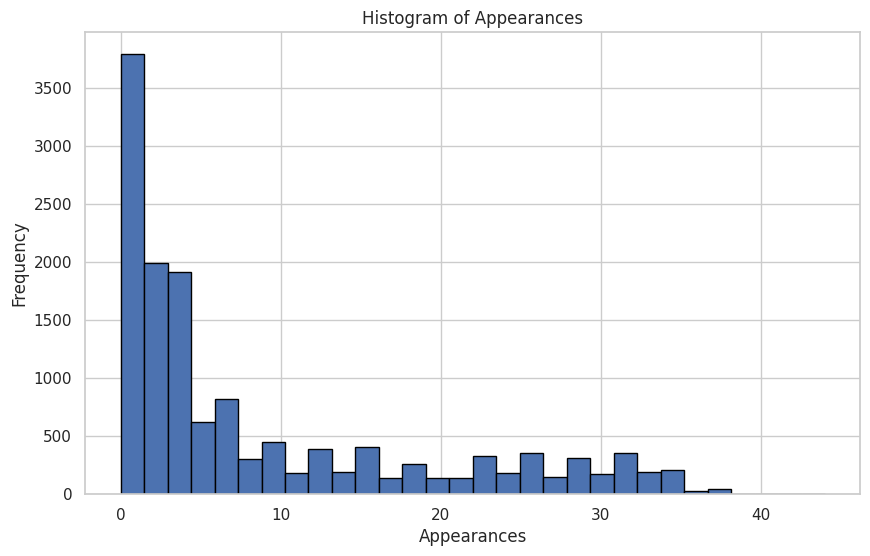

In [45]:
# Sicherstellen, dass alle Werte in 'Einsätze' numerisch sind
df_seasons['Einsätze'] = pd.to_numeric(df_seasons['Einsätze'], errors='coerce')

# Fehlende Werte entfernen
df_seasons_cleaned = df_seasons.dropna(subset=['Einsätze'])

# Histogramm erstellen
plt.figure(figsize=(10, 6))
plt.hist(df_seasons_cleaned['Einsätze'], bins=30, edgecolor='black')
plt.title('Histogram of Appearances')
plt.xlabel('Appearances')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### The histogram shows a right-skewed distribution, indicating that many players have few appearances while only a few play regularly.

### Minutes played of the entire dataset

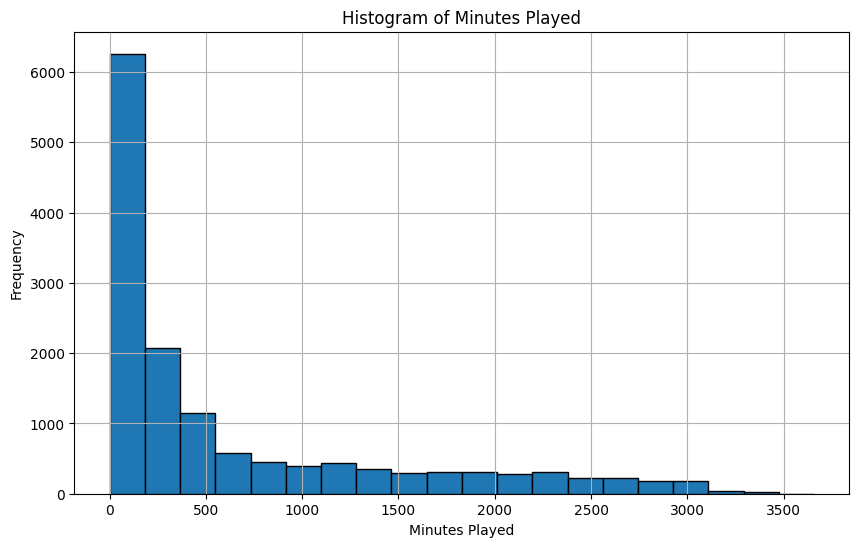

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(df_seasons['Eingesetzte Minuten'].dropna(), bins=20, edgecolor='black')
plt.title('Histogram of Minutes Played')
plt.xlabel('Minutes Played')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### The histogram shows a right-skewed distribution, indicating that most players have few minutes played, while only a few accumulate a high number of minutes.

### Market Value of the entire dataset

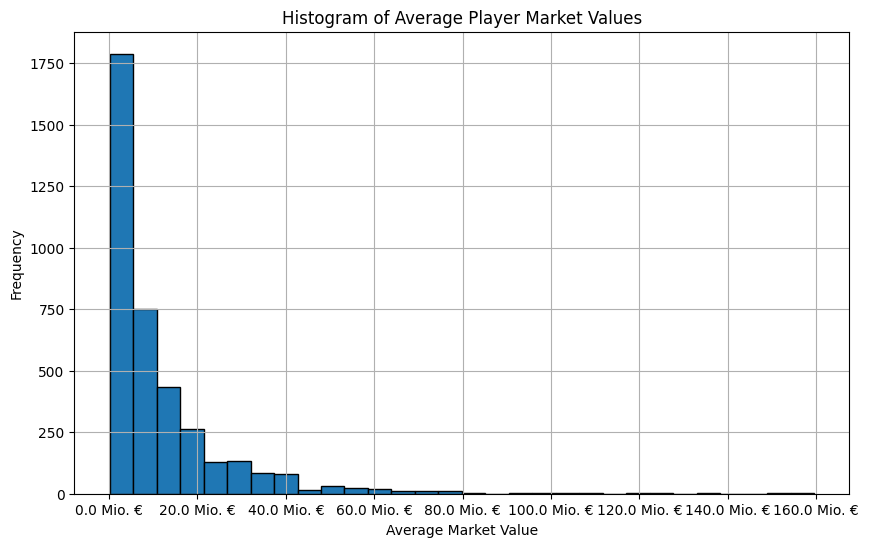

In [40]:
# Daten zusammenführen: Spielerprofil mit Marktwerten verknüpfen
df_merged = pd.merge(df_value, df_spieler, how='left', left_on='player_id', right_on='Spieler_id')

# Histogramm der Marktwerte erstellen
plt.figure(figsize=(10, 6))
plt.hist(df_merged['avg_market_value'].dropna(), bins=30, edgecolor='black')
plt.title('Histogram of Average Player Market Values')
plt.xlabel('Average Market Value')
plt.ylabel('Frequency')
plt.grid(True)
# X-Achse in Millionen formatieren
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*1e-6:.1f} Mio. €'))

plt.show()

#### The histogram shows a right-skewed distribution, with most players having low market values and only a few reaching extremely high values.

## Boxplots

### Boxplot of Appearances of the entire dataset

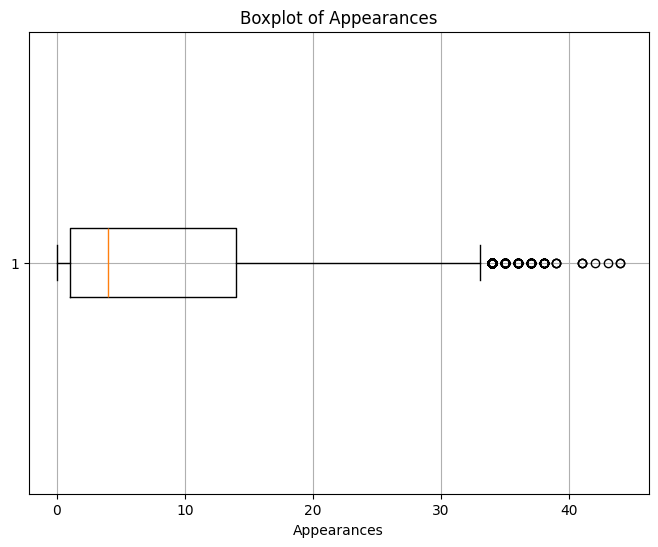

In [43]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_seasons['Einsätze'].dropna(), vert=False)
plt.title('Boxplot of Appearances')
plt.xlabel('Appearances')
plt.grid(True)
plt.show()

#### The boxplot of appearances shows that most players have between 0 and 10 appearances, with a median around 3, while a few outliers exceed 30 appearances, indicating that only a small number of players consistently participate in matches.

### Boxplot of minutes played of the entire dataset

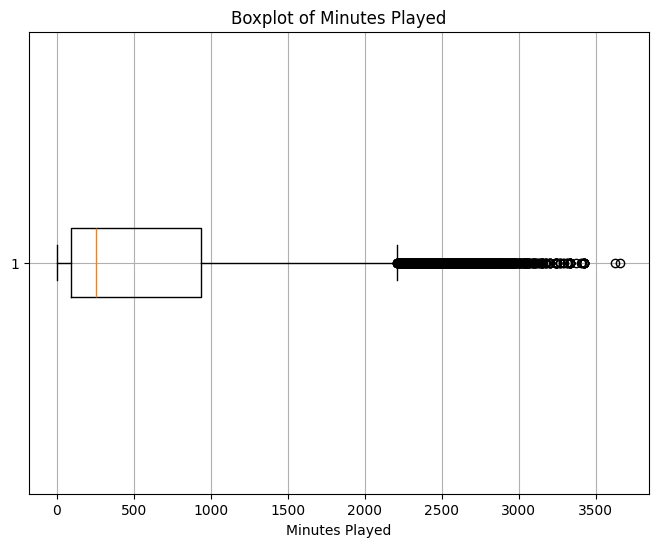

In [44]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_seasons['Eingesetzte Minuten'].dropna(), vert=False)
plt.title('Boxplot of Minutes Played')
plt.xlabel('Minutes Played')
plt.grid(True)
plt.show()

#### The boxplot of minutes played shows that most players accumulate between 0 and 1,000 minutes, with a median around 400 minutes, while a few outliers exceed 2,500 minutes, highlighting that only a small group of players consistently play full matches.

### Boxplot of average market value of the entire dataset

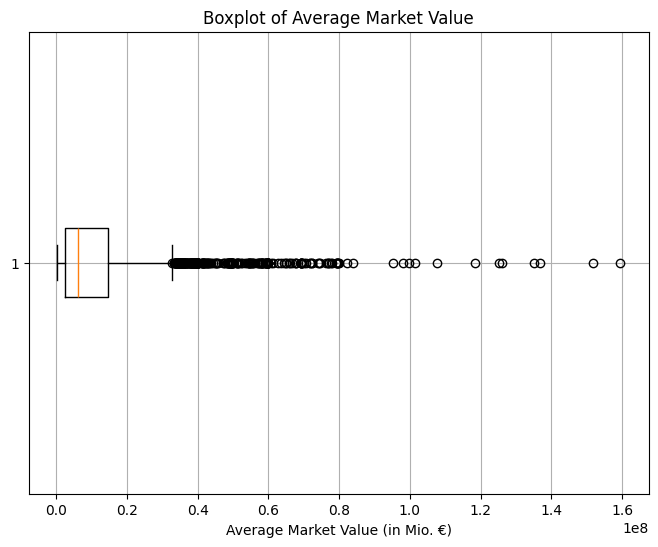

In [47]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_merged['avg_market_value'].dropna(), vert=False)
plt.title('Boxplot of Average Market Value')
plt.xlabel('Average Market Value (in Mio. €)')
plt.grid(True)

plt.show()

#### The boxplot of average market value shows that most players have a market value below €20 million, with a median significantly lower, while a few outliers exceed €100 million, indicating that only a small number of elite players hold exceptionally high market values.

## Pie Chart

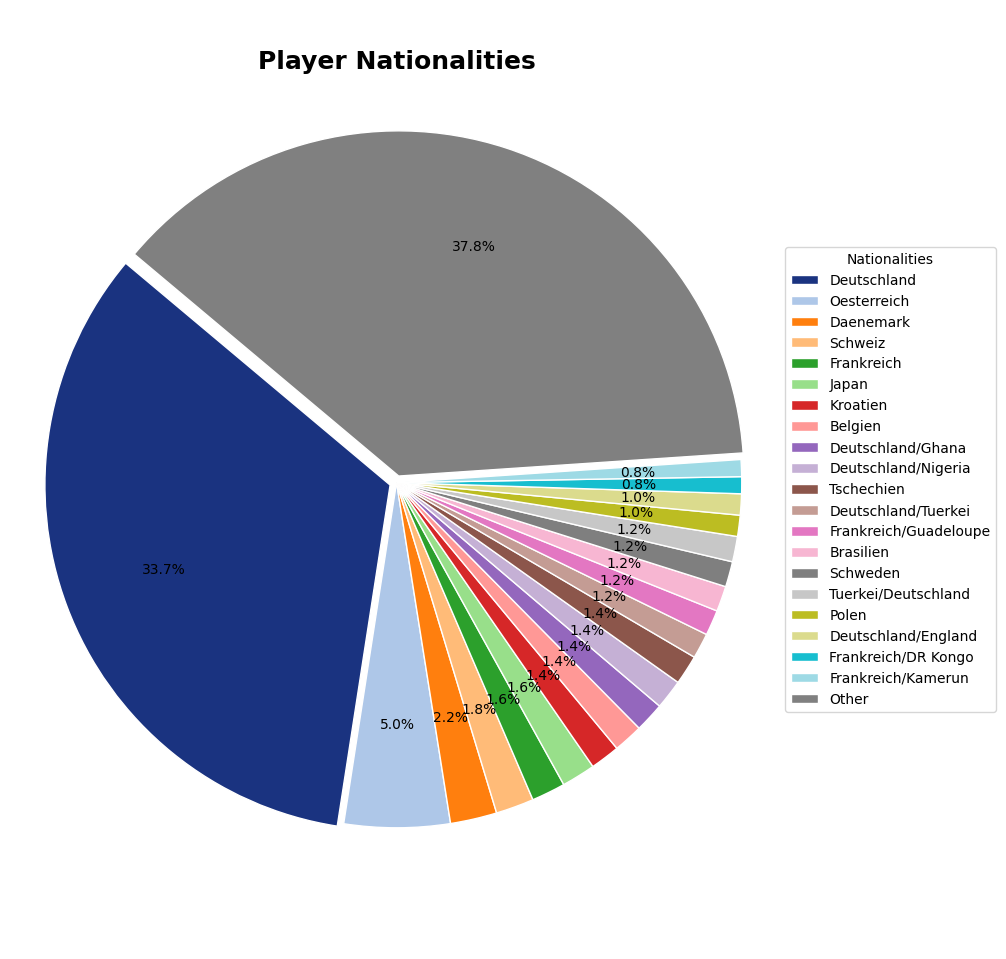

In [15]:
# Nationalitäten zählen
nationalities_counts = df_spieler['Staatsbuergerschaft'].value_counts()

# Top 20 Nationalitäten und den Rest als "Andere" zusammenfassen
top_20_nationalities = nationalities_counts.head(20)
other_nationalities = nationalities_counts[20:].sum()

# Daten für das Pie Chart vorbereiten
nationalities_combined = pd.concat([top_20_nationalities, pd.Series({'Other': other_nationalities})])

# Individuelle Farben festlegen, um "Deutschland" und "Other" zu unterscheiden
colors = list(plt.cm.tab20.colors)
colors[0] = (0.1, 0.2, 0.5)  # Deutschland in Dunkelblau
colors.append((0.5, 0.5, 0.5))  # Other in Grau

# Explode-Effekt, um die Segmente leicht auseinanderzuziehen
explode = [0.02 if nationality in ['Deutschland', 'Other'] else 0 for nationality in nationalities_combined.index]

# Bündiges Pie Chart mit Beschriftungen innerhalb der Segmente erstellen
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    nationalities_combined,
    labels=None,
    colors=colors,
    explode=explode,
    autopct='%1.1f%%',
    startangle=140,
    shadow=False,
    pctdistance=0.7,  # Prozentangaben näher an der Mitte
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}  # Weiße Trennlinien
)

# Legende hinzufügen
plt.legend(wedges, nationalities_combined.index, title="Nationalities", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Titel in den oberen Bereich des Diagramms setzen
plt.text(0, 1.2, 'Player Nationalities', fontsize=18, weight='bold', ha='center')
plt.axis('equal')  # Sicherstellen, dass der Kreis bündig ist
plt.tight_layout(pad=0.5)
plt.show()

## Line Chart

### Line Chart Goals per Season of Thomas Müller

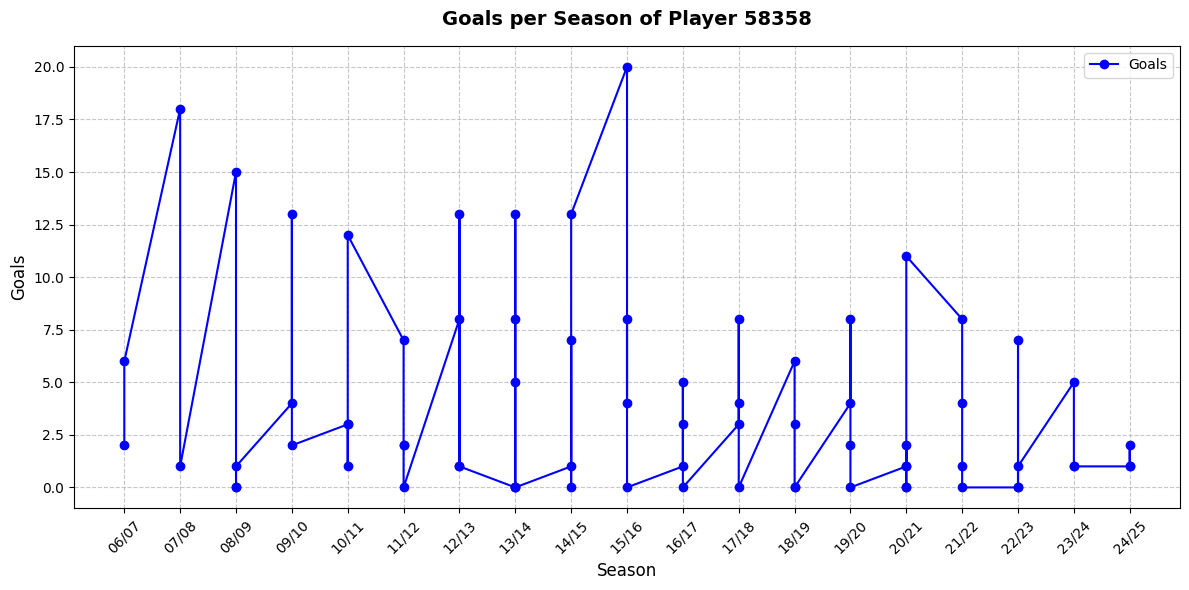

In [34]:
# Beispiel für Spieler_id = 58358 (Thomas Müller)
player_id = 58358
player_goals = df_seasons[df_seasons['spieler_id'] == player_id].copy()

# Duplikate entfernen
player_goals = player_goals.drop_duplicates()

# Saisons bereinigen und sortieren
player_goals['Saison'] = player_goals['Saison'].astype(str).str.replace("'", "").str.strip()

# Saison in Jahreszahlen umwandeln und sortieren
player_goals['Saison_start'] = player_goals['Saison'].str.split('/').str[0]
player_goals = player_goals[player_goals['Saison_start'].str.isdigit()]
player_goals['Saison_start'] = player_goals['Saison_start'].astype(int)
player_goals = player_goals.sort_values('Saison_start')

# Tore bereinigen
player_goals['Tore'] = pd.to_numeric(player_goals['Tore'], errors='coerce').fillna(0)

# Plot erstellen
plt.figure(figsize=(12, 6))
plt.plot(player_goals['Saison'], player_goals['Tore'], marker='o', linestyle='-', color='blue', label='Goals')
plt.title(f'Goals per Season of Player {player_id}', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Goals', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


### Line Chart market value of Thomas Müller per season

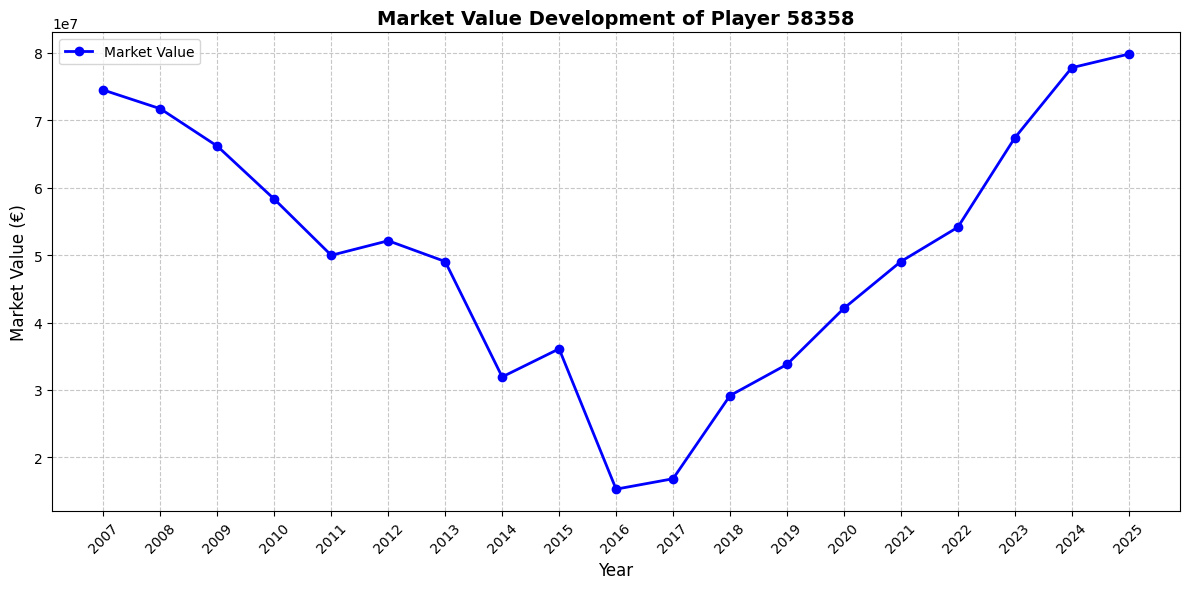

In [38]:
# Spieler-ID für Thomas Müller
player_id = 58358

# Daten für den Spieler filtern
player_value = df_value[df_value['player_id'] == player_id].copy()

# Fehlende Werte entfernen und Daten korrekt formatieren
player_value['year'] = pd.to_numeric(player_value['year'], errors='coerce')
player_value['avg_market_value'] = pd.to_numeric(player_value['avg_market_value'], errors='coerce')
player_value = player_value.dropna(subset=['year', 'avg_market_value'])

# Nach Jahr sortieren
player_value = player_value.sort_values('year')

# Plot erstellen
plt.figure(figsize=(12, 6))
plt.plot(player_value['year'], player_value['avg_market_value'],
         marker='o', linestyle='-', color='blue', linewidth=2, markersize=6, label='Market Value')

plt.title(f'Market Value Development of Player {player_id}', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Market Value (€)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(player_value['year'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### Date stimmet vorne und hine nöd

## Scatterplot-Matrix

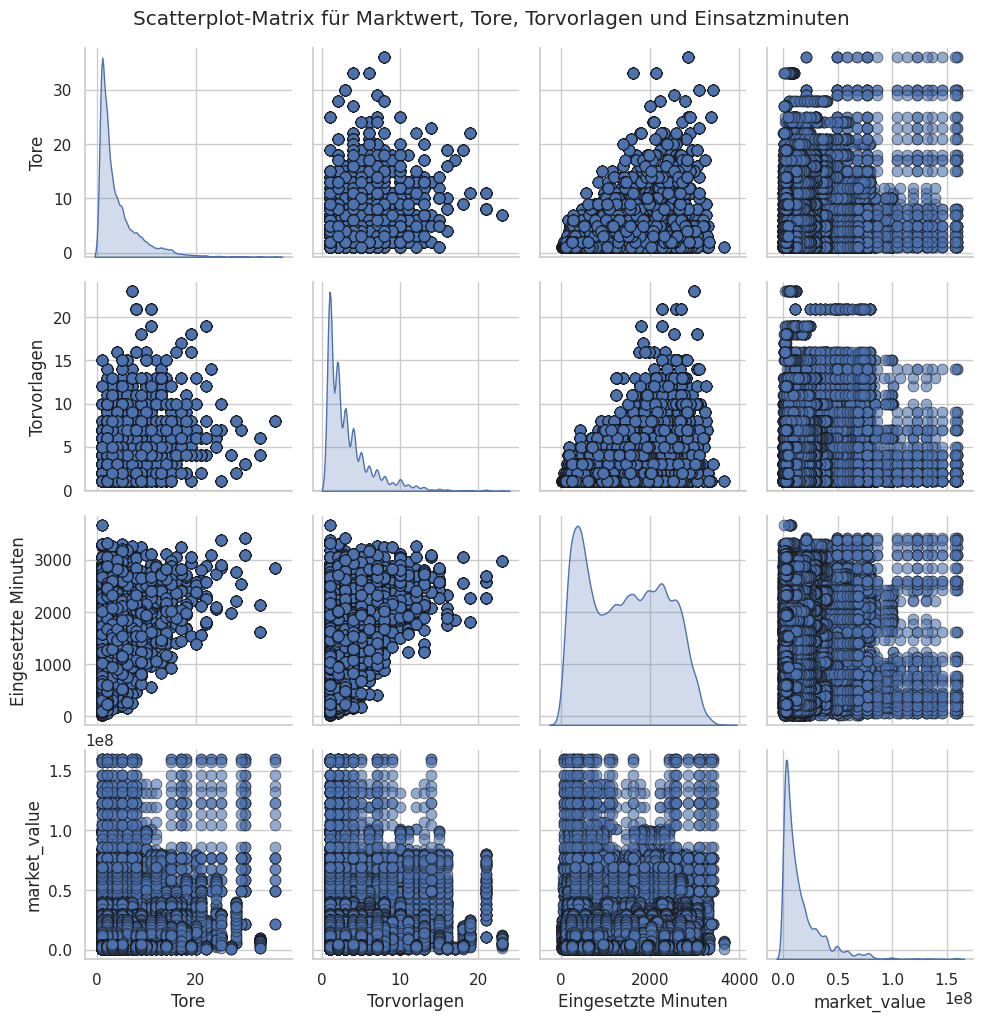

In [43]:
# CSV-Dateien laden (Pfad anpassen)
combined_seasons = pd.read_csv("combined_seasons.csv", delimiter=";")
market_value_data = pd.read_csv("market_value_data.csv", delimiter=";")

# Umbenennen der Spieler-ID-Spalte zur Vereinheitlichung
combined_seasons.rename(columns={'spieler_id': 'Spieler_id'}, inplace=True)
market_value_data.rename(columns={'player_id': 'Spieler_id'}, inplace=True)

# Zusammenführen der Datensätze
merged_df = combined_seasons.merge(market_value_data, on='Spieler_id', how='left')

# Wichtige Spalten extrahieren
selected_columns = ['Tore', 'Torvorlagen', 'Eingesetzte Minuten', 'market_value']

# Konvertierung in numerische Werte
for col in selected_columns:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# NaN-Werte entfernen
filtered_df = merged_df[selected_columns].dropna()

# Verbesserte Scatterplot-Matrix mit KDE-Diagonalen und einheitlicher Ästhetik
sns.set(style="whitegrid", context="notebook")
sns.pairplot(filtered_df, diag_kind="kde", plot_kws={'alpha': 0.6, 's': 60, 'edgecolor': 'k'})
plt.suptitle("Scatterplot-Matrix für Marktwert, Tore, Torvorlagen und Einsatzminuten", y=1.02)
plt.show()

#### The scatterplot matrix shows that market value is partially correlated with goals and assists, but this relationship is not directly proportional. Minutes played do not have a clear impact on market value. Further analyses could help to better understand these relationships, especially by considering factors like player position, age, or injury history.

# Regression Modeling

## Lineaer Regression Model for...

 r-squared, mse

## Random Forest Regression

Weshalb wurde der Code im anderen Projekt genutzt? 
- Ein Random Forest Regressor wurde zur Vorhersage des Marktwerts verwendet, um nichtlineare Zusammenhänge besser abzubilden. (Feature Importance könnte man auch beachten)

Als Orierntierung folgende Dateien aus den Übungen verwenden:
- linear_regression.html
- regression_trees_random_forest.html

# k-means clustering (wird als Synonym für classification verwendet)

Als Orientierung folgende Dateien aus den Übungen verwenden:
- classification_analysis_supermarkets.html
- classification_analysis_titanic.html
- NLP_hotel_reviews_sentiment_prediction.html

# Correct interpretation of model results and measures of fit.

Für Regression verwendete Metriken: MSE, R-squared, fit, Interpretation

Für Classification verwendete Metriken: Accuracy, Precision, Recall, F1-Score, Confusion Matrix, MSE, R-squared, Model Evaluation

Frage 6 wird auch von solchen Metriken gesprochen, die man verwenden soll/darf.